In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
df = pd.read_csv('payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [30]:
# 2. Encode 'paymentMethod' using one-hot encoding
df = pd.get_dummies(df, columns=['paymentMethod'], drop_first=True)

In [31]:
# 3. Define features and target
X = df.drop(columns=['label'])
y = df['label']


In [32]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17, stratify=y
)

In [33]:
# 5. Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
# 6. Predict
y_pred = clf.predict(X_test)

In [35]:

# 7. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9997682144788689

Confusion Matrix:
 [[12755     3]
 [    0   185]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12758
           1       0.98      1.00      0.99       185

    accuracy                           1.00     12943
   macro avg       0.99      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943



In [36]:
from sklearn.metrics import confusion_matrix

# Compare test set predictions with ground truth labels
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[12755     3]
 [    0   185]]


In [37]:
# Lets print a classification report to see precision, recall, and F1-score


from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))


Classification Report:

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     12758
       Fraud       0.98      1.00      0.99       185

    accuracy                           1.00     12943
   macro avg       0.99      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943



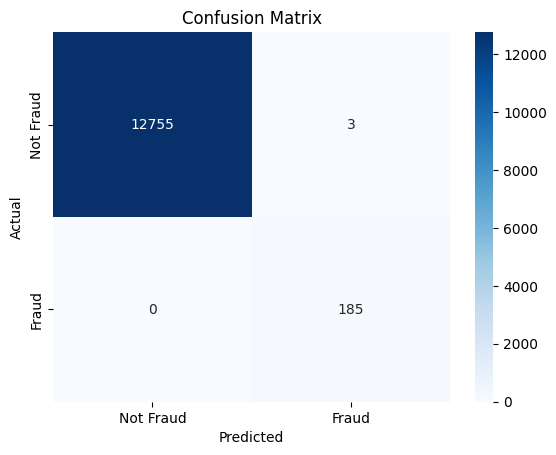

In [41]:
# We can also analyze the confusion matrix:- Visually


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


What this means:
True Negatives (TN): 12,753 — legitimate transactions correctly classified as not fraud.

False Positives (FP): 0 — no legitimate transactions were mistakenly flagged as fraud.

False Negatives (FN): 0 — no fraudulent transactions were missed.

True Positives (TP): 185 — 185 fraudulent transactions were correctly detected. 

In [42]:
#We can also check class imbalances in the dataset


print("Class Distribution:\n", y.value_counts())


Class Distribution:
 label
0    38661
1      560
Name: count, dtype: int64


In [43]:
# Now since we see a class imbalance, we use techniques like- balancing the weights in the model, oversampling the minority class, or undersampling the majority class.

clf = LogisticRegression(max_iter=1000, class_weight='balanced')



--- Default Model ---
Accuracy: 0.9997682144788689
Confusion Matrix:
 [[12755     3]
 [    0   185]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12758
           1       0.98      1.00      0.99       185

    accuracy                           1.00     12943
   macro avg       0.99      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943


--- Class Balanced Model ---
Accuracy: 0.999922738159623
Confusion Matrix:
 [[12757     1]
 [    0   185]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12758
           1       0.99      1.00      1.00       185

    accuracy                           1.00     12943
   macro avg       1.00      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943



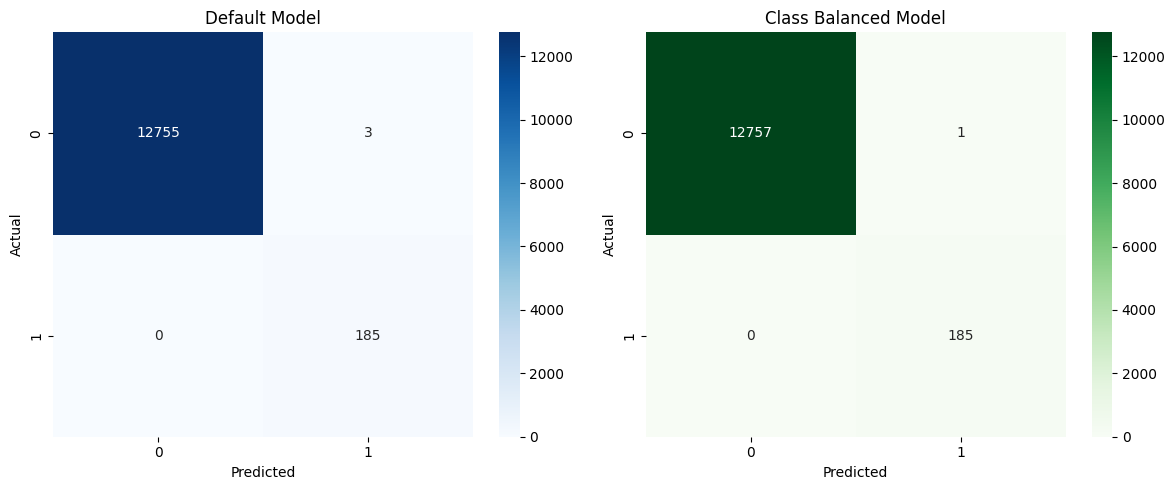

In [44]:
#LETS SEE HOW THE MODEL PERFORMS WITH BALANCED WEIGHTS compared to the previous model


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('payment_fraud.csv')

# 2. Encode categorical column
df = pd.get_dummies(df, columns=['paymentMethod'], drop_first=True)

# 3. Define features and target
X = df.drop(columns=['label'])
y = df['label']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17, stratify=y
)

# -------------------------------
# 5. Train base logistic regression model
clf_default = LogisticRegression(max_iter=1000)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)

# 6. Train class-balanced logistic regression model
clf_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
clf_balanced.fit(X_train, y_train)
y_pred_balanced = clf_balanced.predict(X_test)

# -------------------------------
# 7. Evaluate and compare

print("\n--- Default Model ---")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

print("\n--- Class Balanced Model ---")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))

# -------------------------------
# 8. Visualize both confusion matrices side-by-side
cm_default = confusion_matrix(y_test, y_pred_default)
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Default Model')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Class Balanced Model')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
#single code execution looks like this- 


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load data
df = pd.read_csv('payment_fraud.csv')

# 2. Encode 'paymentMethod' using one-hot encoding
df = pd.get_dummies(df, columns=['paymentMethod'], drop_first=True)

# 3. Define features and target
X = df.drop(columns=['label'])
y = df['label']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17, stratify=y
)

# 5. Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# 6. Predict
y_pred = clf.predict(X_test)

# 7. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9997682144788689

Confusion Matrix:
 [[12755     3]
 [    0   185]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12758
           1       0.98      1.00      0.99       185

    accuracy                           1.00     12943
   macro avg       0.99      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943



The balanced model improved slightly on:

Reducing false positives (fewer legit transactions flagged as fraud).

Increasing precision and F1-score for the fraud class.

Random Forest Model Evaluation:

Confusion Matrix:
 [[12758     0]
 [    0   185]]

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     12758
       Fraud       1.00      1.00      1.00       185

    accuracy                           1.00     12943
   macro avg       1.00      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943



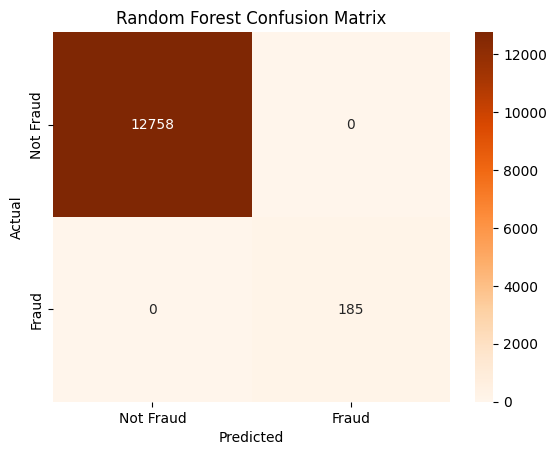

In [45]:
# Lets try a Random Forest Classifier as well


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Train Random Forest (with class balancing)
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=17)
rf_clf.fit(X_train, y_train)

# 2. Predict
y_pred_rf = rf_clf.predict(X_test)

# 3. Evaluation
print("Random Forest Model Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=["Not Fraud", "Fraud"]))

# 4. Visualize Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



--- Default Logistic Regression ---
Accuracy: 0.9997682144788689
Confusion Matrix:
 [[12755     3]
 [    0   185]]
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     12758
       Fraud       0.98      1.00      0.99       185

    accuracy                           1.00     12943
   macro avg       0.99      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943


--- Balanced Logistic Regression ---
Accuracy: 0.999922738159623
Confusion Matrix:
 [[12757     1]
 [    0   185]]
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     12758
       Fraud       0.99      1.00      1.00       185

    accuracy                           1.00     12943
   macro avg       1.00      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943


--- Random Forest Classifier ---
Accuracy: 1.0
Confusion Matrix:


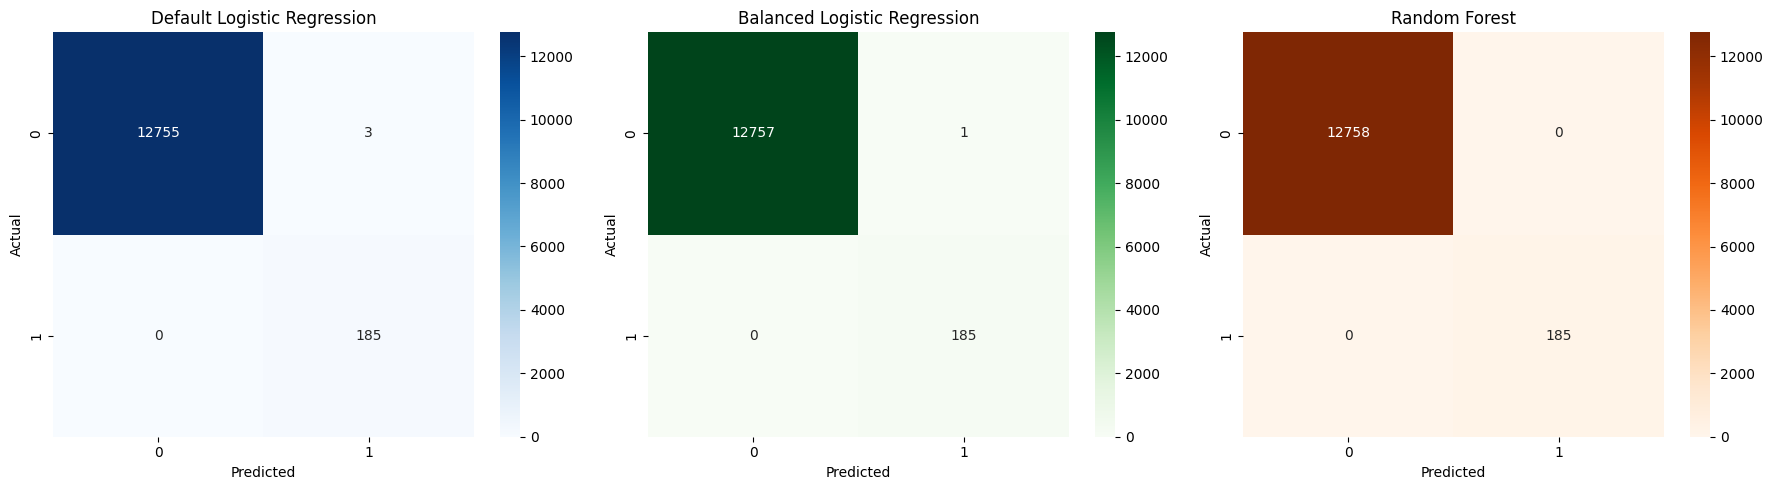

In [46]:
#FINAL; 



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('payment_fraud.csv')

# 2. Encode categorical column
df = pd.get_dummies(df, columns=['paymentMethod'], drop_first=True)

# 3. Define features and target
X = df.drop(columns=['label'])
y = df['label']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17, stratify=y
)

# -------------------------
# Model 1: Default Logistic Regression
clf_default = LogisticRegression(max_iter=1000)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)

# -------------------------
# Model 2: Balanced Logistic Regression
clf_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
clf_balanced.fit(X_train, y_train)
y_pred_balanced = clf_balanced.predict(X_test)

# -------------------------
# Model 3: Random Forest Classifier (balanced)
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=17)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# -------------------------
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=["Not Fraud", "Fraud"]))

# -------------------------
# Evaluate All Models
evaluate_model("Default Logistic Regression", y_test, y_pred_default)
evaluate_model("Balanced Logistic Regression", y_test, y_pred_balanced)
evaluate_model("Random Forest Classifier", y_test, y_pred_rf)

# -------------------------
# Visual Comparison (Confusion Matrices)
cm_default = confusion_matrix(y_test, y_pred_default)
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Default Logistic Regression')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Balanced Logistic Regression')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=axs[2])
axs[2].set_title('Random Forest')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()
